In [1]:
# Импорты
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pydot
import random
from keras.utils.vis_utils import plot_model
import os
from matplotlib.colors import ListedColormap


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [81]:
seed_value = 14
os.environ['PYTHONHASHSEED']=str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

model = keras.Sequential([
    keras.layers.Dense(784, input_dim=784, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.RMSprop(), metrics=['accuracy'])

In [82]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [83]:
image_size = x_train.shape[1]
train_data = x_train.reshape(x_train.shape[0], image_size * image_size)
test_data = x_test.reshape(x_test.shape[0], image_size * image_size)
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')
train_data /= 255.0
test_data /= 255.0

In [84]:
num_classes = 10
train_labels_cat = keras.utils.to_categorical(y_train, num_classes)
test_labels_cat = keras.utils.to_categorical(y_test, num_classes)

In [85]:
model.fit(train_data, train_labels_cat, epochs=3, batch_size=128)#, validation_data=(test_data, test_labels_cat))

Epoch 1/3
469/469 [==============================] - 8s 16ms/step - loss: 0.2411 - accuracy: 0.9289
Epoch 2/3
469/469 [==============================] - 8s 17ms/step - loss: 0.0931 - accuracy: 0.9725
Epoch 3/3
469/469 [==============================] - 8s 17ms/step - loss: 0.0596 - accuracy: 0.9817


In [7]:
pred_data = model.predict(test_data)

In [8]:
error = [sum(pred_data[i] - test_labels_cat[i]) for i in range(len(test_labels_cat))]

In [9]:
mse = sum(error) / len(error)

In [10]:
print('me = ' + str(mse))
print('max error = ' + str(max(error)))

me = 5.53205050443898e-09
max error = 2.0744620599089103e-07


In [11]:
points_x = [i % 28 for i in range(784)]
points_y = [i // 28 for i in range(784)][::-1]

8

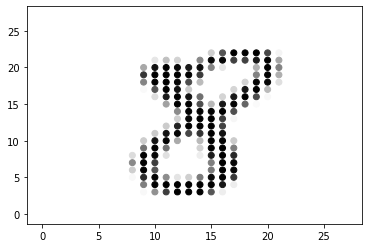

In [47]:
number = 134
predpred = model.predict(np.array([test_data[number]]))

colors = [str(o) for o in [1 - test_data[number] for i in range(len(test_data[number]))][0]]
plt.scatter(points_x, points_y, c=colors)
list(sum(predpred)).index(max(sum(predpred)))

In [49]:
img = keras.preprocessing.image.load_img('8.png', target_size=(28, 28), color_mode='grayscale')

In [50]:
img_arr = np.expand_dims(img, axis=0)
img_arr = 1 - img_arr / 255.0
img_arr = img_arr.reshape((1, 784))
result = model.predict([img_arr])
print(result)

[[6.0395274e-12 7.3095297e-12 2.4376584e-05 6.0298946e-04 4.7746715e-12
  3.7658992e-07 1.0654088e-10 5.9843347e-13 9.9937230e-01 1.6820089e-11]]


8

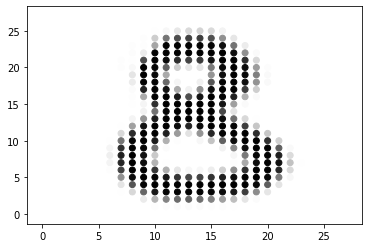

In [59]:
predpred = model.predict([img_arr])

colors = [str(o) for o in [1 - img_arr[0] for i in range(len(img_arr[0]))][0]]
plt.scatter(points_x, points_y, c=colors)
list(sum(predpred)).index(max(sum(predpred)))